In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

pundits = ["benshapiro", "MattWalshBlog", "RealCandaceO", "RubinReport"] # dict

# Creating list to append tweet data to
tweets_list1 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for n, k in enumerate(pundits):
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(f'from:{pundits[n]}').get_items()):  # f string nested for loop
     if i>3000:
            break
     tweets_list1.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
    
# Creating a dataframe from the tweets list above 
tweets_df1 = pd.DataFrame(tweets_list1, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

In [2]:
from urllib.parse import urlparse
#https://stackoverflow.com/a/52455972
def is_url(url):
  try:
    result = urlparse(url)
    return all([result.scheme, result.netloc])
  except ValueError:
    return False
# remove URLs
tweets_df1['Text'] = [' '.join(y for y in x.split() if not is_url(y)) for x in tweets_df1['Text']]
print (tweets_df1)

                       Datetime             Tweet Id  \
0     2022-07-13 20:18:26+00:00  1547314531508043777   
1     2022-07-13 19:19:13+00:00  1547299627254382594   
2     2022-07-13 15:18:23+00:00  1547239022115934210   
3     2022-07-13 14:47:24+00:00  1547231225051504642   
4     2022-07-13 13:49:08+00:00  1547216561907302400   
...                         ...                  ...   
11999 2021-10-08 15:59:02+00:00  1446505424681721856   
12000 2021-10-08 15:54:40+00:00  1446504325866405888   
12001 2021-10-08 15:34:49+00:00  1446499331503116298   
12002 2021-10-08 15:10:03+00:00  1446493095810375683   
12003 2021-10-08 14:57:56+00:00  1446490046572359689   

                                                    Text     Username  
0                               They are actually women.   benshapiro  
1                                          Good for him.   benshapiro  
2                   Wrong kippas. Clearly Chovevei guys.   benshapiro  
3      It's gonna be fun when he does t

In [3]:


from __future__ import print_function
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.utils.data_utils import get_file
import numpy as np
import random
import sys
import io

In [4]:
# drop empty cells
import numpy as np

tweets_df1['Text'].replace('', np.nan, inplace=True )

tweets_df1.dropna(subset=['Text'], inplace=True)

In [5]:
# lowercase all
text = tweets_df1['Text'].str.lower()

In [6]:
np.random.seed(12345)
np.random.choice(text,10)

array(['not a fan of this. don’t “overhaul” the office. abolish it. we have to stop accepting the left’s premise on these things.',
       'california is to fear what florida is to freedom…',
       'the state department has issued a strongly worded tweet about the importance of international pronouns day',
       'now #whatisawoman is trending. it would be really unfortunate for the women’s march if it made it to number one. #whatisawoman is a very frightening question for them. please respect their feelings #whatisawoman',
       'clyde made a special guest appearance during my interview with @laurenboebert! the full interview is up early and ad-free via my @onlocals community.',
       'okay but it’s the exact same amount of sunshine either way',
       'i‘ve spent the last week in a very poor and dangerous country, working on a project that will be announced soon. americans who fetishize oppression and victimhood have no idea what it looks like up close. much of the world is a horr

In [7]:
print('BEFORE:')
print(text[0])
text = text.map(lambda s: ' '.join([x for x in s.split() if 'http' not in x]))
print('AFTER:')
print(text[0])


BEFORE:
they are actually women.
AFTER:
they are actually women.


max tweet length: 350
min tweet len: <bound method NDFrame._add_numeric_operations.<locals>.min of 0         24
1         13
2         36
3        269
4        193
        ... 
11999     12
12000     76
12001    215
12002     46
12003     33
Name: Text, Length: 11809, dtype: int64>


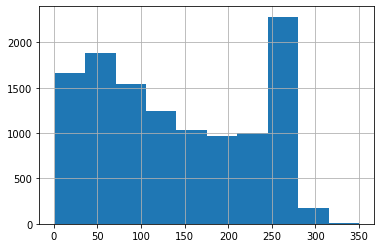

In [8]:
import matplotlib
print('max tweet length:', text.map(len).max())
print('min tweet len:', text.map(len).min)
text.map(len).hist();

In [9]:
# use tweets only over 50 characters

text = text[text.map(len)>50]
len(text)

9372

In [10]:
# get chars dictionary

chars = sorted(list(set(''.join(text))))
print("total char:", len(chars))

char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

total char: 208


In [11]:
chars

[' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '=',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '|',
 '~',
 '¯',
 'à',
 'é',
 'í',
 'ñ',
 '÷',
 'ú',
 '֔',
 '֙',
 '֤',
 'ְ',
 'ֲ',
 'ִ',
 'ֵ',
 'ֶ',
 'ַ',
 'ָ',
 'ֹ',
 'ּ',
 '־',
 'ׁ',
 'א',
 'ב',
 'ד',
 'ה',
 'ו',
 'ח',
 'י',
 'ך',
 'כ',
 'ל',
 'ם',
 'מ',
 'נ',
 'ע',
 'צ',
 'ק',
 'ר',
 'ש',
 'ת',
 '\u200d',
 '–',
 '—',
 '‘',
 '’',
 '“',
 '”',
 '…',
 '\u2066',
 '\u2069',
 '™',
 '⅓',
 '♀',
 '✓',
 '✔',
 '❌',
 '❤',
 '⬜',
 'ツ',
 'ー',
 '광',
 '구',
 '국',
 '내',
 '니',
 '다',
 '말',
 '서',
 '수',
 '습',
 '에',
 '영',
 '을',
 '이',
 '입',
 '있',
 '정',
 '제',
 '책',
 '한',
 '할',
 '️',
 '🇦',
 '🇧',
 '🇨',
 '🇬',
 '🇮',
 '🇱',
 '🇳',
 '🇸',
 '🇹',
 '🇺',
 '🇿',
 '🍌',
 '🍎',
 '🎵',
 '🏴',
 '🐉',
 '🐊',
 '🐍',


In [12]:
for c in chars[62:]:
    print('\nCHAR:', c)
    smple = [x for x in text if c in x]
    print(random.sample(smple, min(3, len(smple))))


CHAR: |
['"indigenous people\'s day" is anti-american nonsense | ep. 815', 'terrified leftists cry out in despair as elon musk takes over twitter | ep. 938', 'dems call for legislation to stop tornadoes | ep. 856']

CHAR: ~
['"so, whilst it is in human nature to engage in conversation with others, to be friendly, unfortunately, this is not the time to do that." new south wales has an average of ~300 cases per day and 2 deaths; population is 8 million.', 'tonight. 8 pm est. @mattwalshblog will finally answer the question the entire left refuses to answer, all in celebration of the most important period on the american calendar, lgbtqia+*?-%$#&amp;~ month!', "that's a big reason why 9 of the 10 best states for unemployment are red, and ~17 of the top 20. and it's why all nine+dc of the worst are blue."]

CHAR: ¯
["trump: the election was stolen! media: that's undermining democracy! biden: every single election in a republican state will be stolen if you don't pass this bill that's not g

In [13]:
# remove characters

import re
for c in chars[62:]:
    text = text.str.replace(c,'')

/var/folders/2_/dkxg0fq56mv06fxh6723qjn00000gn/T/ipykernel_923/3326390067.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  text = text.str.replace(c,'')


In [14]:
# get chars dictionary

chars = sorted(list(set(''.join(text))))
print("total char:", len(chars))

char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

total char: 62


In [15]:
# cut the text in semi-redundant sequences of max len characters
maxlen = 40
step = 1
sentences = []
next_chars = []
for x in text:
    for i in range(0, len(x) - maxlen, step):
        sentences.append(x[i: i + maxlen])
        next_chars.append(x[i + maxlen])
print('nb sequences:', len(sentences))

nb sequences: 1211551


In [16]:
# example
for i in range(3):
    print(sentences[i], '===>', next_chars[i])

it's gonna be fun when he does this with ===>  
t's gonna be fun when he does this with  ===> t
's gonna be fun when he does this with t ===> h


In [17]:
text[0]

KeyError: 0

In [18]:

  #  Turn X into matrix of (numer_of_sentences,max_len_of_sentence,num_chars).
   # If char i is number j char in sentence k, there will be a 1 in location (k,j,i)
    #Turn y into a vector of (number_of_sentences,num_chars).
   # If character z is the next character in sentence k, there will be a 1 in locaiton (k,z)

print('Vectorization.....')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=bool)
y = np.zeros((len(sentences), len(chars)), dtype=bool)

for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
      x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

Vectorization.....


In [34]:
# build model 
#
#
#    Define we have a sequential model   Add an LSTM layer with 128 units. Input shape is a matrix of maxlen characters, where each character is a vector of len(chars)
 #   Add a dense layer (fully connected layer) and have the softmax activation pick a winner from the len(chars) possible characters.
 #   Pick an optimizer for the network and choose categorical_crossentropy loss function (used in multiclass classification).

print('Build model..')
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars), activation='softmax'))

# optimizer = RMSprop(1r=0.01)
optimizer = Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

Build model..


In [35]:
#We don't want the next character to be the one with the highest probaility (we'll get the same results every time).
# So we sample with temperature parameter
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [36]:
def on_epoch_end(epoch, _):
    # Function invoked at end of each epoch. Prints generated text.
    print()
    print('----- Generating text after Epoch: %d' % epoch)
    
#     start_index = random.randint(0, len(text) - maxlen - 1)
    tweet = np.random.choice(text) # select random tweet
    start_index = 0

    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print('----- diversity:', diversity)

        generated = ''
        sentence = tweet[start_index: start_index + maxlen]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(120):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.

            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


Epoch 1/5
9466/9466 [==============================] - ETA: 0s - loss: 2.1579
----- Generating text after Epoch: 0
----- diversity: 0.2
----- Generating with seed: "the one in which jesse kelly and lauren "
the one in which jesse kelly and lauren and the poresting the consersed the pored to and the work and the wore the people the work the preated and the searing t
----- diversity: 0.5
----- Generating with seed: "the one in which jesse kelly and lauren "
the one in which jesse kelly and lauren the gover the riss in the cand in the the worked in prealing and is and been you can childn and the sulder a can entime 
----- diversity: 1.0
----- Generating with seed: "the one in which jesse kelly and lauren "
the one in which jesse kelly and lauren waming. on the, beit netsent: incaicted of ancons savely onmoted wheren to nother conmect ants work: and of awchiate thi
----- diversity: 1.2
----- Generating with seed: "the one in which jesse kelly and lauren "
the one in which jesse kelly and l

In [41]:

print('Build model..')
model2 = Sequential()
model2.add(LSTM(128, input_shape=(maxlen, len(chars)), return_sequences=True))
model2.add(Dropout(0.2))
model2.add(LSTM(128))
model2.add(Dropout(0.2))
model2.add(Dense(len(chars), activation='softmax'))

# optimizer = RMSprop(1r=0.01)
optimizer = Adam()
model2.compile(loss='categorical_crossentropy', optimizer=optimizer)

Build model..


In [42]:


epochs = 60

print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

model2.fit(x, y,
          batch_size=128,
          epochs=epochs,
          callbacks=[print_callback])



Epoch 1/60
9466/9466 [==============================] - ETA: 0s - loss: 2.1955
----- Generating text after Epoch: 0
----- diversity: 0.2
----- Generating with seed: "once again, conservatives and trump supp"
once again, conservatives and trump supporting the months and the more continue that the months and the actual sent of the truth and and the more control the mo
----- diversity: 0.5
----- Generating with seed: "once again, conservatives and trump supp"
once again, conservatives and trump supported to the one of the bantigation and american to suppone of the case. they can fate the good to the months because it
----- diversity: 1.0
----- Generating with seed: "once again, conservatives and trump supp"
once again, conservatives and trump supposed hsshit urres what the faccine weach againct stagemanly by a your and this file to "got towarly ducceptions of weir 
----- diversity: 1.2
----- Generating with seed: "once again, conservatives and trump supp"
once again, conservatives and tru